<a href="https://colab.research.google.com/github/nithishbabu/machine-learning-project/blob/main/zomato_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import gensim
from gensim.models.keyedvectors import KeyedVectors
import re
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, Dropout, LSTM, GRU
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')


In [6]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [7]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
res=data.copy(deep=True)

In [9]:
res.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [10]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [11]:
data.shape

(51717, 17)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

COLUMNS


In [13]:

data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

NO.OF NULL VALUES IN EACH

In [14]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#dropping the unwanted columns

In [15]:
data=data.drop(['url','address','phone','dish_liked','menu_item'], axis=1)
data.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [16]:
data.shape

(51717, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   reviews_list                 51717 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [18]:
#removing duplicates
data.drop_duplicates(inplace=True)
data.shape

(51645, 12)

#ANALYZING ALL THE COLUMNS

In [19]:
#features need to understand Easily so
data.rename(columns={'approx_cost(for two people)':'costfor2plates', 'listed_in(type)':'type', 'listed_in(city)':'city'}, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2plates,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


#Data cleaning

In [20]:
#rate column
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
#we have 3 string values we have to remove it(new,nan,-)
def rate(value):
  if(value=='NEW' or value=='-'):
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(rate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

##Filling null values with mean in rate COLUMNS



In [22]:
data['rate'].fillna(data['rate'].mean(), inplace =True)
data['rate'].isnull().sum()

0

##dropping null values in whole dataset as they are very small

In [23]:
data.dropna(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2plates,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [24]:
data.isnull().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
costfor2plates    0
reviews_list      0
type              0
city              0
dtype: int64

#we have both city and loaction, lets keep ***one*** ***only***

In [25]:
data=data.drop(['city'], axis=1)


In [26]:
data['costfor2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#***Removing*** commas because it represents as ***strings***

In [27]:
def removecomma(value):
  value==str(value)
  if "," in value:
    value=value.replace(",", '')
    return float(value)
  else:
    return float(value)
data['costfor2plates']=data['costfor2plates'].apply(removecomma)
data['costfor2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#cleaning location column

In [28]:
data['location'].value_counts()

BTM                      5056
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

#Making a seperate group for locations which are having lessthan 300 restaurants

In [29]:
location=data['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]

In [30]:
def location(value):
  if(value in location_lessthan300):
    return "others"
  else:
    return value
data['location']=data['location'].apply(location)
data['location'].value_counts()

BTM                      5056
others                   4955
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
Indiranagar              2032
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1215
Koramangala 7th Block    1176
Koramangala 6th Block    1127
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1013
Banashankari              902
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            673
Brookefield               656
New BEL Road              644
Banaswadi                 641
Kammanahalli              639
Rajajinagar               591
Church Street             568
Lavelle Ro

#Now REST TYPE column

In [31]:
data['rest_type'].value_counts()

Quick Bites                   19015
Casual Dining                 10259
Cafe                           3685
Delivery                       2574
Dessert Parlor                 2243
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

#Here we can see some types which are very less so we make a group of types which are less than 1000 

In [32]:
rest_types=data["rest_type"].value_counts(ascending=False)
rest_types

Quick Bites                   19015
Casual Dining                 10259
Cafe                           3685
Delivery                       2574
Dessert Parlor                 2243
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [33]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

#changing those less than 1000 into others

In [34]:
def rest_type(value):
  if(value in rest_types_lessthan1000):
    return "others"
  else:
    return value
data['rest_type']=data['rest_type'].apply(rest_type)
data['rest_type'].value_counts()

Quick Bites           19015
Casual Dining         10259
others                 9016
Cafe                   3685
Delivery               2574
Dessert Parlor         2243
Takeaway, Delivery     2009
Bakery                 1140
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

#cleaning cuisines column 

In [35]:
cuisines=data['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

In [36]:
def cuisines(value):
  if(value in cuisines_lessthan100):
    return "others"
  else:
    return value
data['cuisines']=data['cuisines'].apply(cuisines)
data['cuisines'].value_counts()

others                                 26187
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

#Type column

In [37]:
data['type'].value_counts()

Delivery              25599
Dine-out              17567
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  870
Pubs and bars           688
Name: type, dtype: int64

In [38]:
type(data.reviews_list[0])

str

In [39]:

# Creating a new dataset that has only customer reviews and restaurant ratings
reviews_data = data[["reviews_list", "rate"]]
# Examining the reviews for the first restaurant in the dataset
reviews_data["reviews_list"][0]
# The text needs cleaning up

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [40]:
# Converting all the text to lowercase
reviews_data["reviews_list"] = reviews_data["reviews_list"].apply(lambda x: x.lower())


In [41]:
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = reviews_data["reviews_list"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

['rated', 'rated', 'n', 'a', 'beautiful', 'place', 'to', 'dine', 'in', 'the', 'interiors', 'take', 'you', 'back', 'to', 'the', 'mughal', 'era', 'the', 'lightings', 'are', 'just', 'perfect', 'we', 'went', 'there', 'on', 'the', 'occasion', 'of', 'christmas', 'and', 'so', 'they', 'had', 'only', 'limited', 'items', 'available', 'but', 'the', 'taste', 'and', 'service', 'was', 'not', 'compromised', 'at', 'all', 'the', 'only', 'complaint', 'is', 'that', 'the', 'breads', 'could', 'have', 'been', 'better', 'would', 'surely', 'like', 'to', 'come', 'here', 'again', 'rated', 'rated', 'n', 'i', 'was', 'here', 'for', 'dinner', 'with', 'my', 'family', 'on', 'a', 'weekday', 'the', 'restaurant', 'was', 'completely', 'empty', 'ambience', 'is', 'good', 'with', 'some', 'good', 'old', 'hindi', 'music', 'seating', 'arrangement', 'are', 'good', 'too', 'we', 'ordered', 'masala', 'papad', 'panner', 'and', 'baby', 'corn', 'starters', 'lemon', 'and', 'corrionder', 'soup', 'butter', 'roti', 'olive', 'and', 'chill

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:

# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])

In [45]:
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [46]:
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(5)

[('place', 968773),
 ('good', 948397),
 ('food', 897688),
 ('chicken', 397481),
 ('service', 322865)]

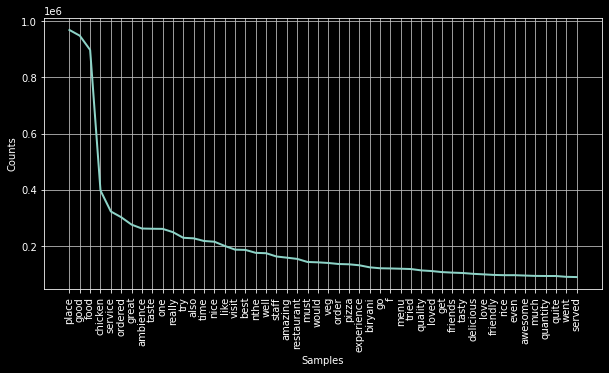

In [47]:
plt.figure(figsize = (10, 5))
fd.plot(50)
plt.show()

#Data cleaning is done, lets see Visualization


#Visualising online order

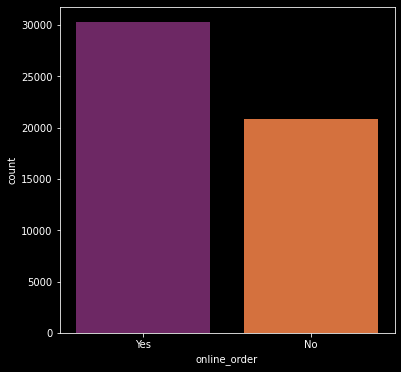

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='inferno')

#Visualsing book table 

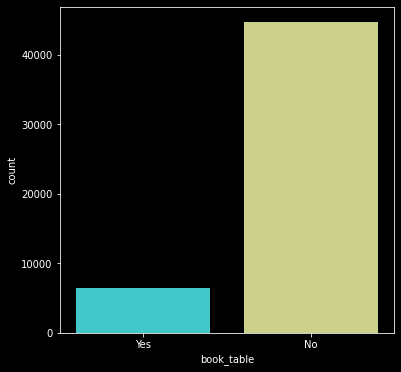

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(data['book_table'], palette= 'rainbow')


This says most of the restaurants not having booking table facility

#Visualising locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

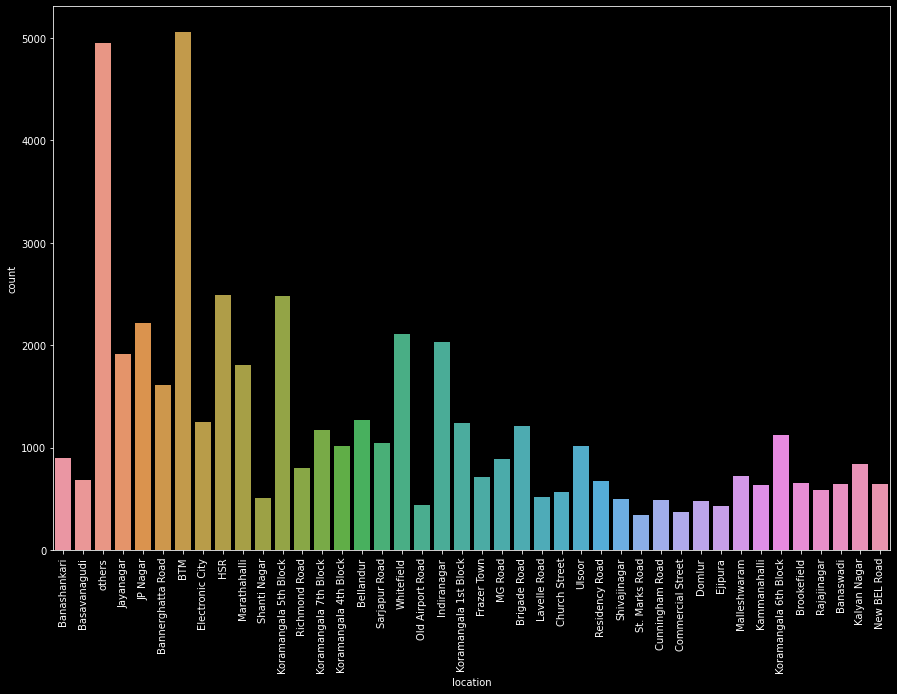

In [50]:
plt.figure(figsize=(15,10))
axis=sns.countplot(data['location'])
plt.xticks(rotation=90)

This says  that which location having no. of restaurants in area

#visualising Book table vs rate 

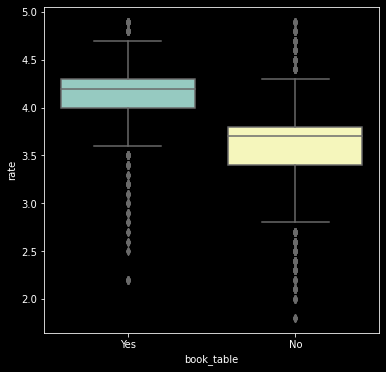

In [51]:
plt.figure(figsize=(6,6))
sns.boxplot(x="book_table",y="rate", data =data)

Here's the difference is high because, restaurants having book table facility rating is higher than restaurants not having book table facility.

#visualising online order

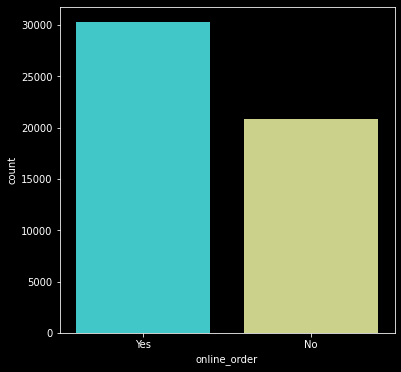

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(data['online_order'], palette='rainbow')

From this we can see that most of them having online order facility.


#visualsing online order vs rate(rating)

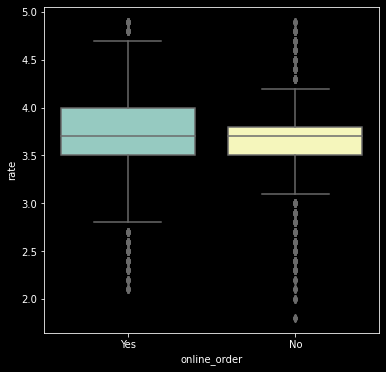

In [53]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

This says that restaurants having online order facility rating is higher than not having online order facility

In [54]:
#visualsing online order facility, location wise

In [55]:
data1=data.groupby(['location','online_order'])['name'].count()
data1.to_csv('location_online.csv')
data1=pd.read_csv('location_online.csv')
data1=pd.pivot_table(data1, values=None, index=['location'], columns=['online_order'],fill_value=0, aggfunc=np.sum)
data1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   339
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            553   662
Brookefield             239   417
Church Street           226   342
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   220
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1911
Indiranagar             701  1331
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   867  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   390   786
Lavelle Road            316   205
MG Road                 520   374
Malleshwaram            309   412
Marathahalli            701  1107
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          425   248
Richmond Road           557   247
Sarjapur Road           324   725
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   624
Whitefield              986  1120
others                 2064  2891

This says that which location having no. of online order and not having online order in restaurants

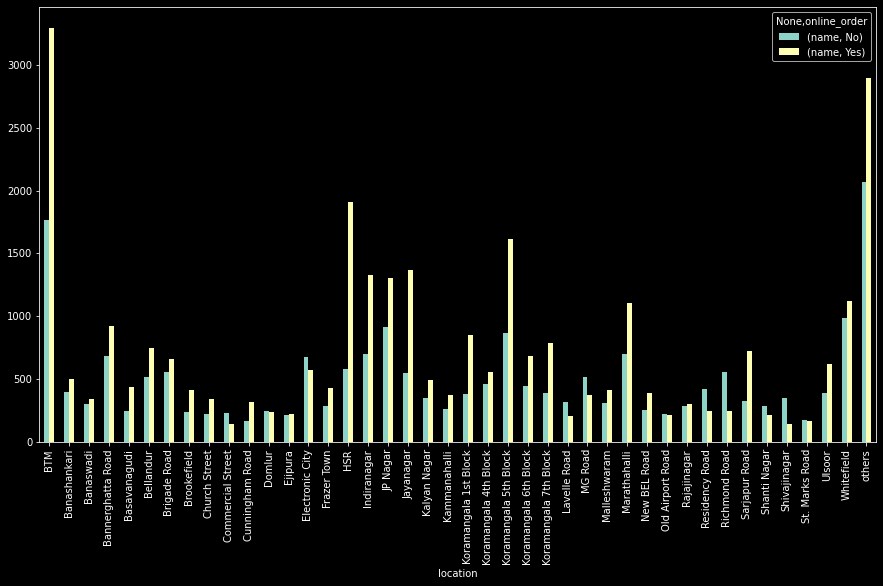

In [56]:
data1.plot(kind='bar', figsize=(15,8))

#visualsing book table facility, location wise

In [57]:
data2=data.groupby(["location","book_table"])["name"].count()
data2.to_csv('location_booktable.csv')
data2=pd.read_csv('location_booktable.csv')
data2=pd.pivot_table(data2, values=None, index=["location"], columns=['book_table'],fill_value=0, aggfunc=np.sum)
data2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               633    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1036  179
Brookefield             582   74
Church Street           386  182
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 434    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2278  217
Indiranagar            1579  453
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1788  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  164
Lavelle Road            290  231
MG Road                 547  347
Malleshwaram            632   89
Marathahalli           1642  166
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          523  150
Richmond Road           688  116
Sarjapur Road           893  156
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  836  177
Whitefield             1853  253
others                 4587  368

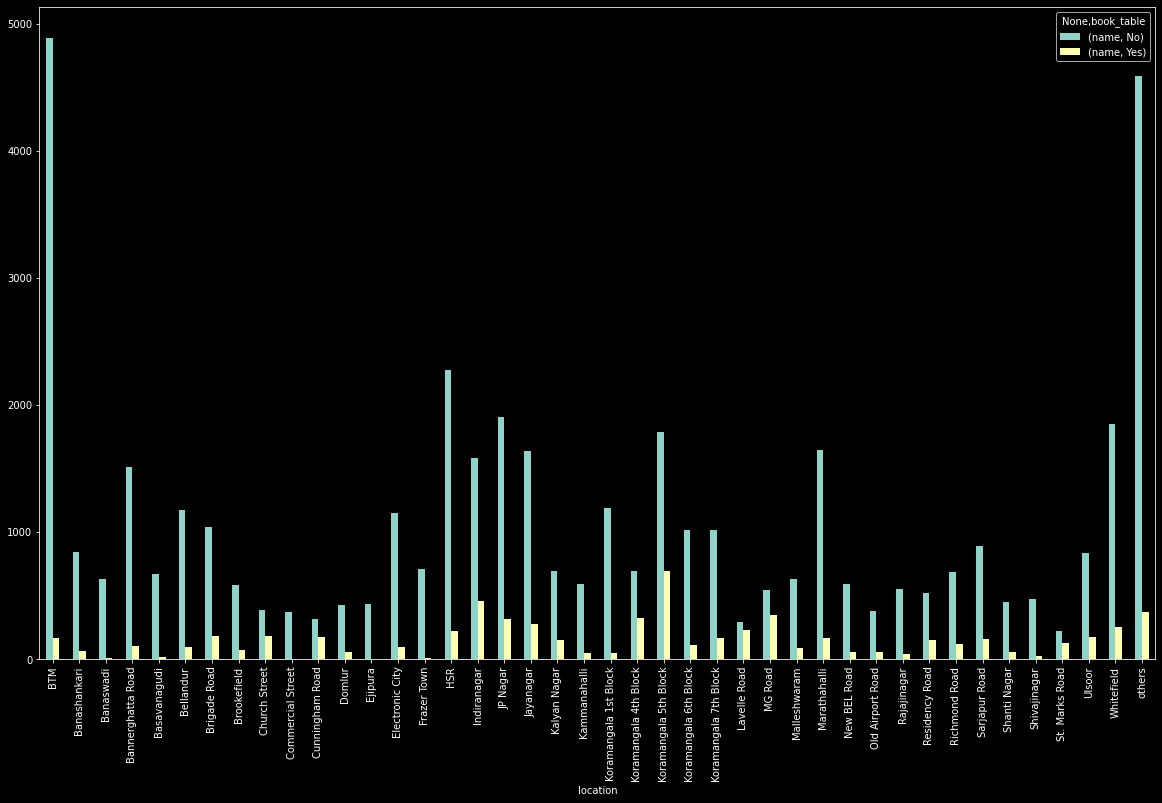

In [58]:
data2.plot(kind='bar', figsize=(20,12))

#Restaurants vs rate

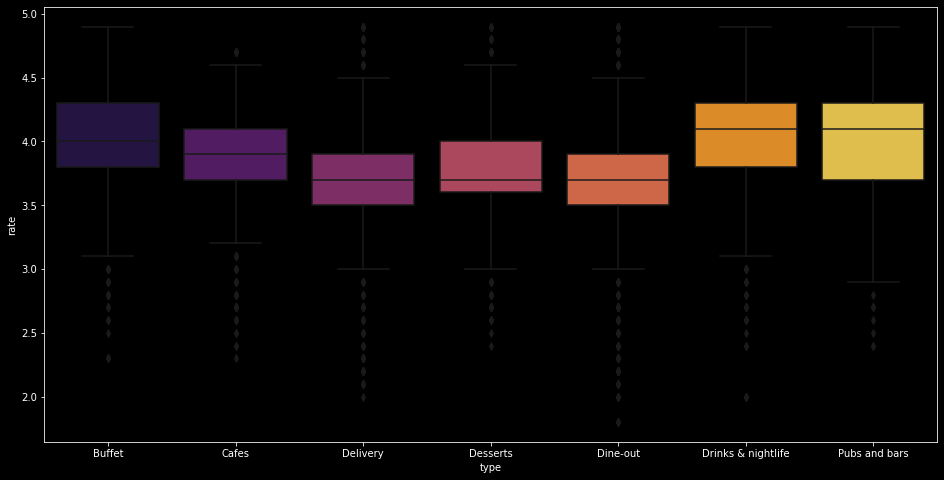

In [59]:
plt.figure(figsize=(16,8))
sns.boxplot(x='type',y='rate', data=data, palette="inferno")

Here we can see that drinks and night life restaurants and pubs and bars are getting high rating compared to others

#clustering types of restaurants, location wise

In [60]:
data3=data.groupby(['location','type'])['name'].count()
data3.to_csv('location_type.csv')
data3=pd.read_csv("location_type.csv")
data3=pd.pivot_table(data3, values=None, index=['location'], columns=["type"],fill_value=0, aggfunc=np.sum)
data3

name        ...                                 
type                  Buffet Cafes  ... Drinks & nightlife Pubs and bars
location                            ...                                 
BTM                       21    83  ...                 22            19
Banashankari               7    36  ...                 14             0
Banaswadi                  0    24  ...                  6             1
Bannerghatta Road          9    46  ...                  9             2
Basavanagudi               7    11  ...                  5             0
Bellandur                 28    36  ...                 17            16
Brigade Road              25    46  ...                 58            22
Brookefield                6    17  ...                  4             0
Church Street             19    51  ...                 36            23
Commercial Street          0    13  ...                  0             0
Cunningham Road           29    34  ...                 16             7
Domlur                    15    13  ...                 12            11
Ejipura                    0     0  ...                  0             0
Electronic City           23    24  ...                 21            21
Frazer Town                1    11  ...                  2             2
HSR                       19    49  ...                 14            18
Indiranagar               38    97  ...                 67            66
JP Nagar                  45    76  ...                 51             7
Jayanagar                 27    77  ...                 12             0
Kalyan Nagar               9    45  ...                 18             0
Kammanahalli               2    27  ...                  6             0
Koramangala 1st Block      3    26  ...                  7            16
Koramangala 4th Block     21    53  ...                 62            34
Koramangala 5th Block     65   146  ...                 84            58
Koramangala 6th Block     18    43  ...                 51            23
Koramangala 7th Block     25    52  ...                 25            26
Lavelle Road              30    27  ...                 60            34
MG Road                   51    76  ...                 53            36
Malleshwaram              11    31  ...                 20            14
Marathahalli              34    32  ...                 23             3
New BEL Road               4    29  ...                  8             8
Old Airport Road          12     5  ...                 12             9
Rajajinagar               10     4  ...                  3            10
Residency Road            20    31  ...                 56            26
Richmond Road             63    21  ...                 16            12
Sarjapur Road             26    22  ...                 20            22
Shanti Nagar               9    22  ...                  9             2
Shivajinagar               6    17  ...                  7             8
St. Marks Road             5    10  ...                 40            22
Ulsoor                    16    56  ...                 23            30
Whitefield                28    51  ...                 47            33
others                    83   133  ...                 75            47

[42 rows x 7 columns]

we can see all types regarding all locations

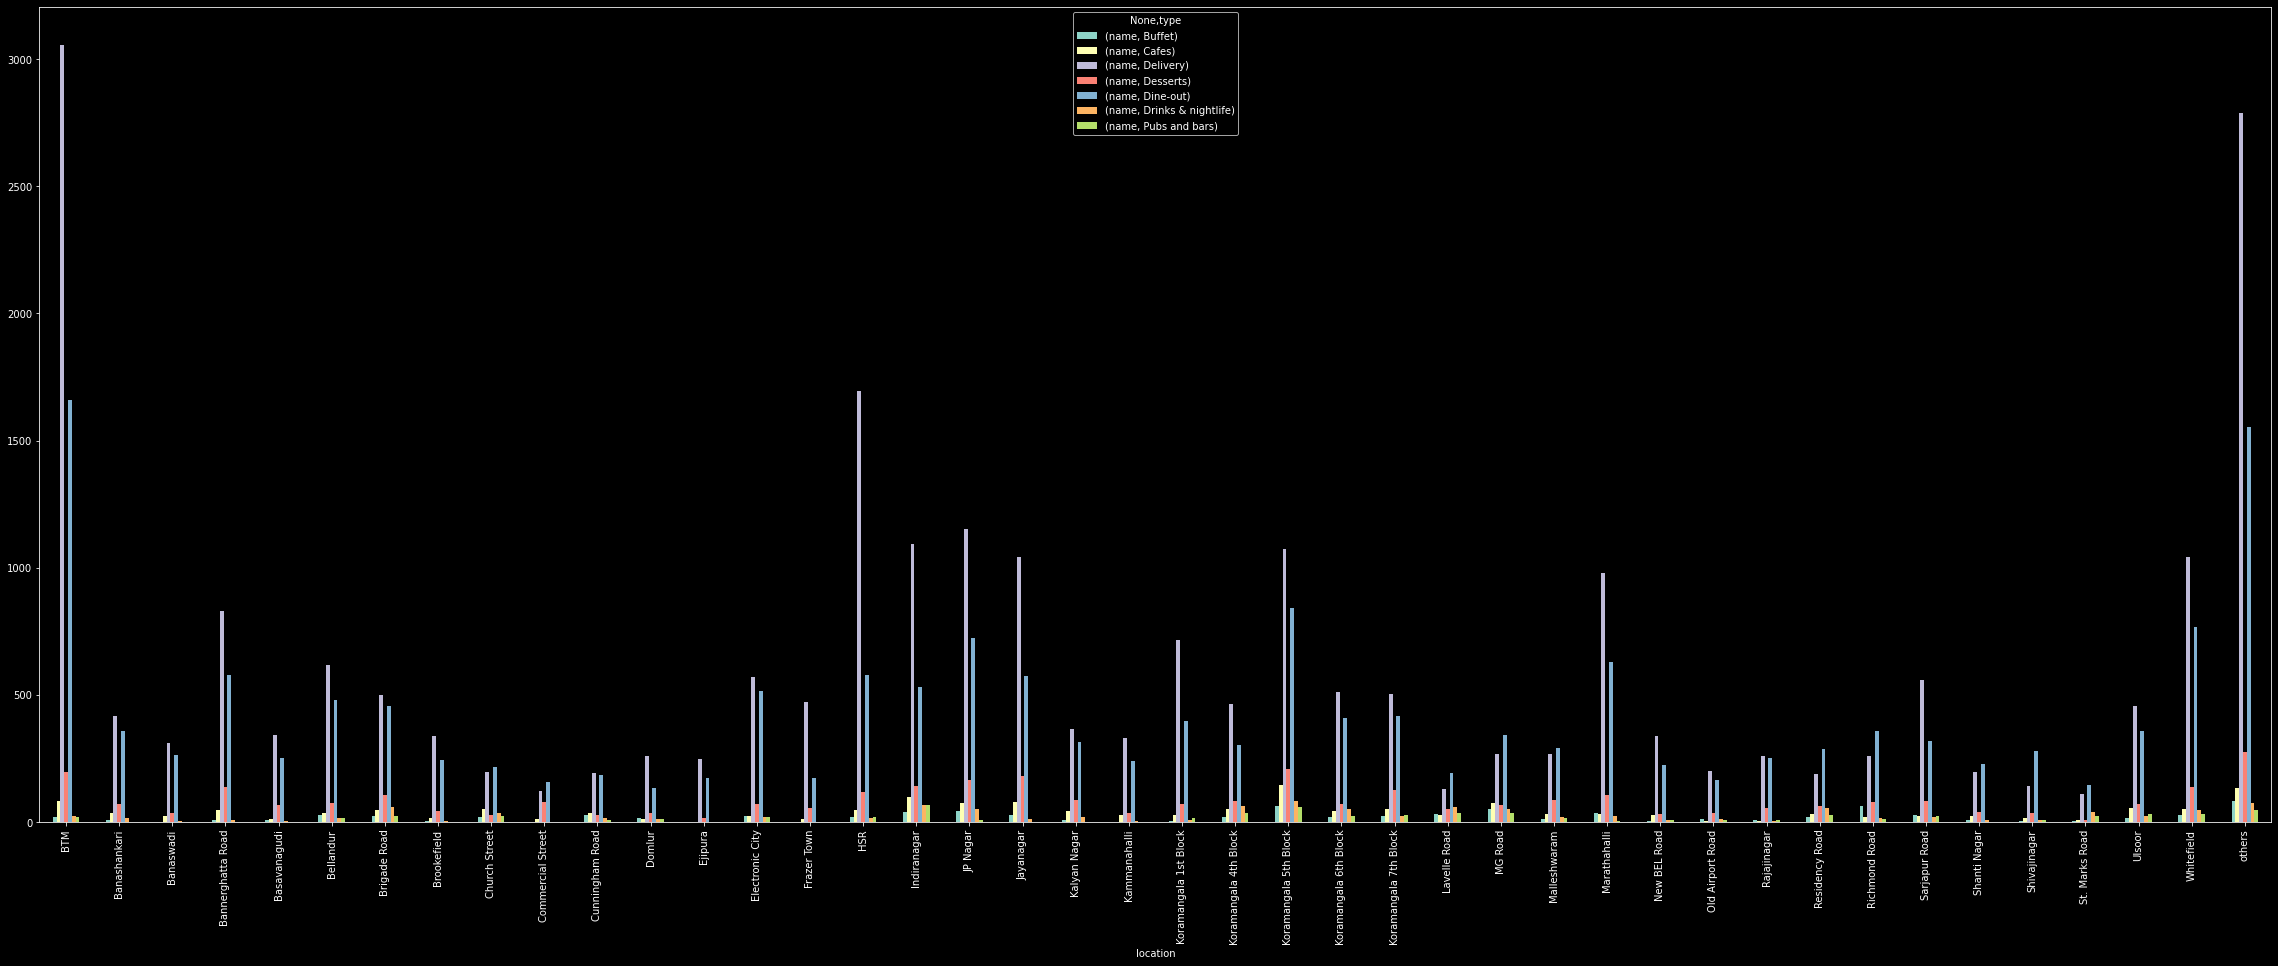

In [61]:
data3.plot(kind="bar", figsize=(40,15))


#No.of votes, location wise

In [62]:
data4=data[['location', 'votes']]
data4.drop_duplicates()
data5=data4.groupby(['location'])['votes'].sum()
data5=data5.to_frame()
data5=data5.sort_values('votes', ascending=False)
data5.head()

,votes
location,
Koramangala 5th Block,2214816
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594938
JP Nagar,586522


above are the votes, location wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

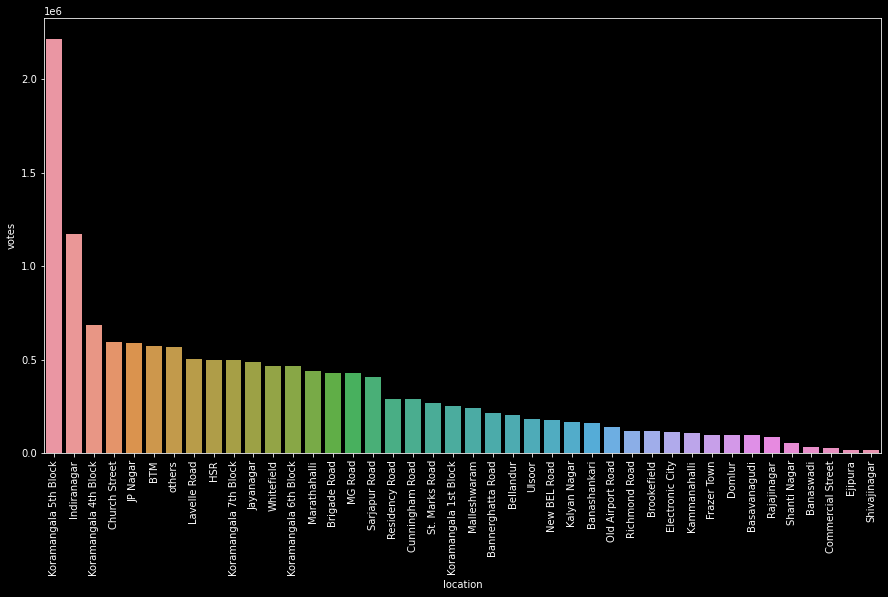

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(data5.index, data5["votes"])
plt.xticks(rotation=90)

above one says about the location wise customers interest in voting or giving feed back

#visualsing top cuisines

In [64]:
data6= data[['cuisines', 'votes']]
data6.drop_duplicates()
data7=data6.groupby(['cuisines'])['votes'].sum()
data7=data7.to_frame()
data7=data7.sort_values('votes', ascending=False)
data7.head()

,votes
cuisines,
others,11584911
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

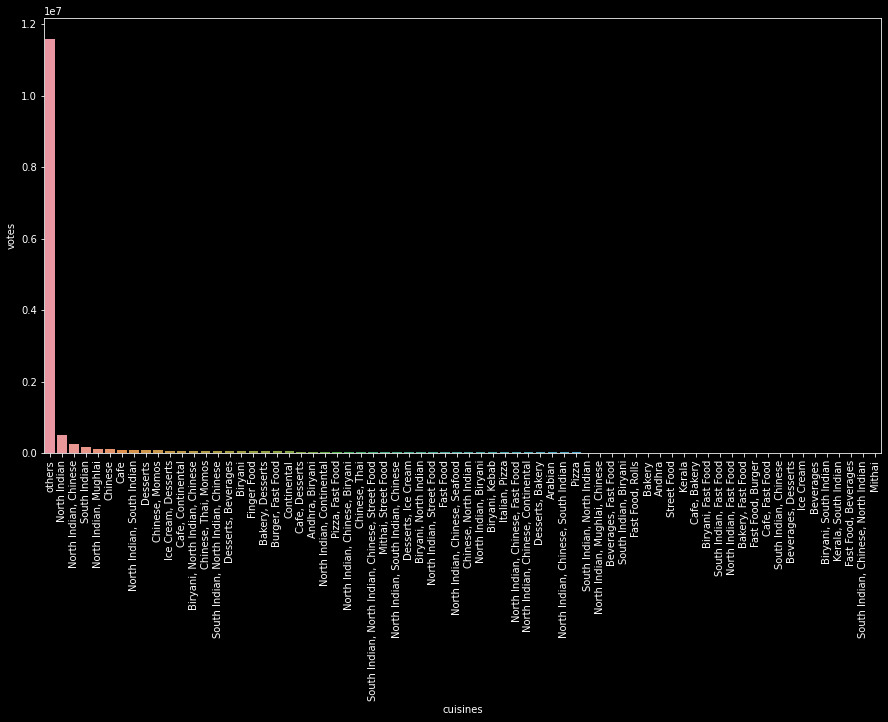

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

In [66]:
#removing others 
data7=data7.iloc[1:, :]
data7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text major ticklabel objects>)

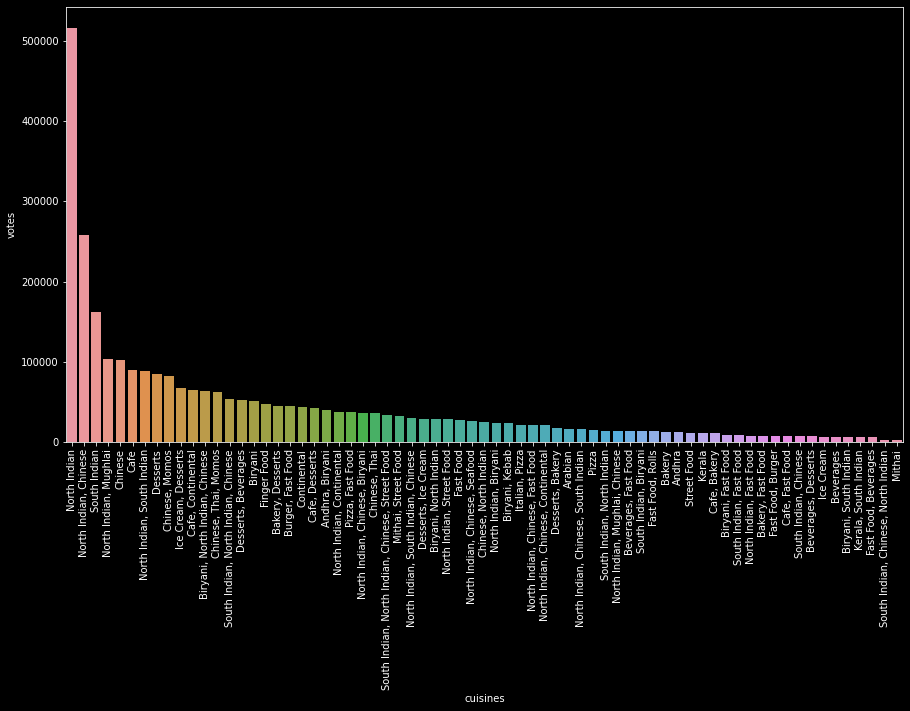

In [67]:
#after removing others
plt.figure(figsize=(15,8))
sns.barplot(data7.index, data7["votes"])
plt.xticks(rotation=90)

Above says highest votes are given to north indian cuisines 

In [68]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2plates,reviews_list,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


#creating a new feature in data

In [69]:
#function to count number of cuisnes
def cuisine_counter(inpStr):
  numcuisines=len(str(inpStr).split(','))
  return(numcuisines)

In [70]:
data['cuisinecount']=data['cuisines'].apply(cuisine_counter)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2plates,reviews_list,type,cuisinecount
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,3
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,2
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,1


In above cuisine count is added

#DATA PREPROCESSING

In [119]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
preprocessed_reviews               0
numbers_of_words                   0
dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [121]:
zomato=data.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'preprocessed_reviews', 'numbers_of_words'],
      dtype='object')

In [122]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city',
       'preprocessed_reviews', 'numbers_of_words'],
      dtype='object')

In [123]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

In [124]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   51717 non-null  object 
 1   name                      51717 non-null  object 
 2   online_order              51717 non-null  object 
 3   book_table                51717 non-null  object 
 4   rate                      43942 non-null  object 
 5   votes                     51717 non-null  int64  
 6   location                  51696 non-null  object 
 7   rest_type                 51490 non-null  object 
 8   cuisines                  51672 non-null  object 
 9   approx_cost_for_2_people  51371 non-null  float64
 10  reviews_list              51717 non-null  object 
 11  menu_item                 51717 non-null  object 
 12  listed_in_type            51717 non-null  object 
 13  listed_in_city            51717 non-null  object 
 14  prepro

In [125]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [126]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

In [127]:
#Now we will remove '/5'

remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [128]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [129]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   49440 non-null  object 
 1   name                      49440 non-null  object 
 2   online_order              49440 non-null  object 
 3   book_table                49440 non-null  object 
 4   rate                      41665 non-null  float64
 5   votes                     49440 non-null  int64  
 6   location                  49419 non-null  object 
 7   rest_type                 49215 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  reviews_list              49440 non-null  object 
 11  menu_item                 49440 non-null  object 
 12  listed_in_type            49440 non-null  object 
 13  listed_in_city            49440 non-null  object 
 14  prepro

In [130]:
#Now we see that 'rate' column has converted to float datatype

#Now we will Label Encode the input variable columns into 0,1,2...

def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [131]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())

In [132]:
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
preprocessed_reviews        0
numbers_of_words            0
dtype: int64

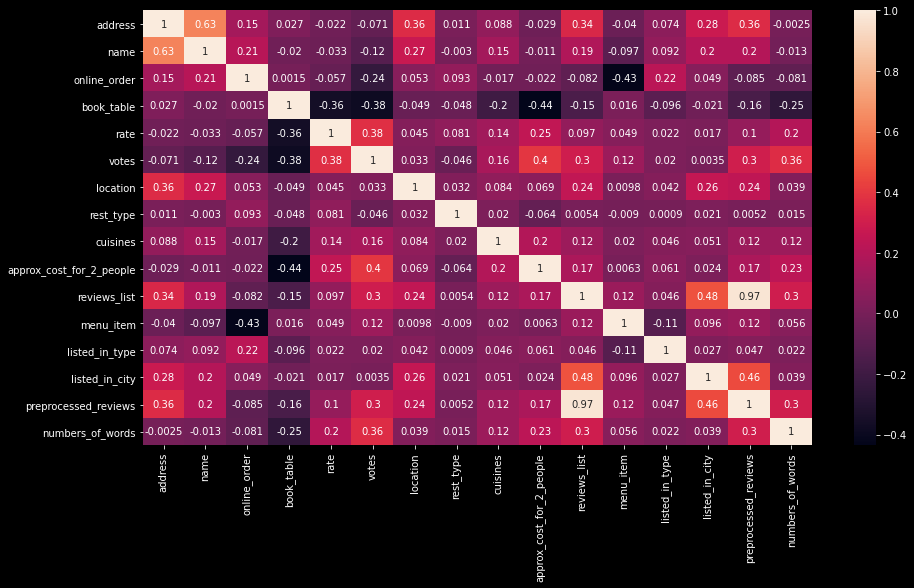

In [133]:
#Checking for correlation among all the x(inputs)

corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [134]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city',
       'preprocessed_reviews', 'numbers_of_words'],
      dtype='object')

#The highest correlation is between name and address which is 0.63 which is not of very much concern
Splitting dataset into train & test

In [135]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [137]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost_for_2_people,menu_item
2386,0,1,414,3,2,607,500.0,0
17957,1,1,210,77,0,5,700.0,0
6148,1,1,5,24,2,33,200.0,0
353,0,1,59,4,0,5,700.0,0
45525,0,1,123,41,4,298,600.0,863


In [138]:
y_train.head()

2386     4.1
17957    3.8
6148     3.4
353      3.6
45525    3.6
Name: rate, dtype: float64

#Applying LINEAR REGRESSION

In [139]:

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.30214916589616214

In [141]:
reg_score=[]
import numpy as np
for j in range(1000):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=j,test_size=0.1)
    lr=LinearRegression().fit(x_train,y_train)
    reg_score.append(lr.score(x_test,y_test))
K=reg_score.index(np.max(reg_score))
#K=353'''

#Applying DECISION TREE REGRESSION

In [147]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8402831690214267

In [144]:
from sklearn.tree import DecisionTreeRegressor
ts_score=[]
for j in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
    dc=DecisionTreeRegressor().fit(x_train,y_train)
    ts_score.append(dc.score(x_test,y_test))
J= ts_score.index(np.max(ts_score))



983

#Applying RANDOM FOREST REGRESSION

In [145]:

from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
#WITH RANDOMFOREST WE ARE GETTING BETTER THAN ABOVE THREE

0.8354533791929184

In [151]:
zomato_en.head(20)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people,reviews_list,menu_item,listed_in_type,listed_in_city,preprocessed_reviews,numbers_of_words
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0,1,1
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0,2,2
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0,3,3
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0,4,4
5,5,5,0,1,3.8,286,1,0,5,600.0,5,0,0,0,5,5
6,6,6,1,1,3.6,8,2,0,6,800.0,6,0,0,0,6,6
7,7,7,0,0,4.6,2556,0,3,7,600.0,7,0,1,0,7,7
8,8,8,0,1,4.0,324,0,4,8,700.0,8,0,1,0,8,8
9,9,9,0,1,4.2,504,0,4,9,550.0,9,0,1,0,9,9


#Proprocessing Text features


In [87]:
data=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [88]:
from bs4 import BeautifulSoup
# Combining all the above stundents 
from tqdm import tqdm
# tqdm is for printing the status bar
word_counter = []

stop_words = set(stopwords.words('english')) 

def filterised_text(text):
    preprocessed_text = []
    for sentance in tqdm(text):
        sentance = re.sub('[0-9]+', '', sentance)
        sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        sentance = ' '.join(word.lower() for word in sentance.split() if len(word)>1 and word.lower() not in stop_words)
        sentance = re.sub(r"rated", "", sentance)
        count = len(sentance.split())
        word_counter.append(count)
        preprocessed_text.append(sentance.strip())
    return preprocessed_text



In [89]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [90]:
preprocessed_reviews = filterised_text(data['reviews_list'].values)
data['preprocessed_reviews']  = preprocessed_reviews
preprocessed_reviews[1822]

100%|██████████| 51717/51717 [03:05<00:00, 279.01it/s]


''

In [91]:
data['numbers_of_words']  = word_counter

In [92]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'preprocessed_reviews',
       'numbers_of_words'],
      dtype='object')

In [149]:
y = data['rate']
X = data.drop(['rate','reviews_list', 'menu_item', 'listed_in(type)', 'dish_liked','cuisines','name'],axis = 1)

In [94]:
#splitting into x and y into train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2,random_state = 42)

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

print(x_tr_txt.shape,y_tr.shape )
print(x_cv_txt.shape,y_cv.shape )
print(x_test_txt.shape,y_test.shape )

x_tr_txt = x_tr['preprocessed_reviews']
x_cv_txt = x_cv['preprocessed_reviews']
x_test_txt = x_test['preprocessed_reviews']

(33098,) (33098,)
(8275,) (8275,)
(10344,) (10344,)


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
count_vect = CountVectorizer(ngram_range=(1,1), min_df=10) 
# train data
X_train_bow = count_vect.fit_transform(x_tr_txt)

# test data
x_cv_bow = count_vect.transform(x_cv_txt)
x_test_bow = count_vect.transform(x_test_txt)


print('X_train_bow',X_train_bow.shape)
print('==='*10)
print('x_cv_bow',x_cv_bow.shape)
print('==='*10)
print('x_test_bow',x_test_bow.shape)

X_train_bow (33098, 19949)
x_cv_bow (8275, 19949)
x_test_bow (10344, 19949)


#LSTM MODEL

In [98]:
X = data['preprocessed_reviews']
y = data['rate']

# split the data set into train and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, shuffle=True)

print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(36201,) (15516,) (36201,) (15516,)


In [99]:
max_review_length = 600
top_words = 10000


## pass through tokenizer
tk = Tokenizer(lower = True, num_words= top_words)
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
## add padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_review_length)
X_test_seq = tk.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_review_length)

print('train data shape ', X_train_pad.shape)
print('test data shape', X_test_pad.shape)


train data shape  (36201, 600)
test data shape (15516, 600)


In [100]:
embedding_vecor_length = 256
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(200))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 256)          2560256   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               365600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 2,926,057
Trainable params: 2,926,057
Non-trainable params: 0
_________________________________________________________________
None
